In [1]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Siam Shipping.csv')
df = df.dropna()

column_titles = ['rating','caption']
df1 = df.reindex(columns=column_titles)
df1

,rating,caption
0,1.0,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...
1,5.0,"I am satisfied with their service , thank you ..."
2,5.0,(Translated by Google) Very professional and a...
3,5.0,"A highly effective team, smooth shipping and e..."
4,5.0,Siam shipping have been the only shipping serv...
5,5.0,Incredible correspondence. The group is resolv...
7,1.0,Siam Shipping are extremely slow to provide fe...
8,5.0,(Translated by Google) Siam Shipping knew how ...
9,5.0,(Translated by Google) I used Siam shipping to...
10,5.0,(Translated by Google) I have been working in ...


In [3]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['Reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [4]:
df1['Reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['Reviews']
    if review == '0':
        df1['Reviews'][i] = review.replace('0', row['caption'])
df1

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_63136/4092710684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'][i] = review.replace('0', row['caption'])


,index,rating,caption,middle,Reviews
0,0,1.0,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...,NaN,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...
1,1,5.0,"I am satisfied with their service , thank you ...",NaN,"I am satisfied with their service , thank you ..."
2,2,5.0,(Translated by Google) Very professional and a...,Very professional and attentive. (Original,Very professional and attentive.
3,3,5.0,"A highly effective team, smooth shipping and e...",NaN,"A highly effective team, smooth shipping and e..."
4,4,5.0,Siam shipping have been the only shipping serv...,NaN,Siam shipping have been the only shipping serv...
5,5,5.0,Incredible correspondence. The group is resolv...,NaN,Incredible correspondence. The group is resolv...
6,7,1.0,Siam Shipping are extremely slow to provide fe...,NaN,Siam Shipping are extremely slow to provide fe...
7,8,5.0,(Translated by Google) Siam Shipping knew how ...,Siam Shipping knew how to transport my scoote...,Siam Shipping knew how to transport my scoote...
8,9,5.0,(Translated by Google) I used Siam shipping to...,I used Siam shipping to send my boat from Koh...,I used Siam shipping to send my boat from Koh...
9,10,5.0,(Translated by Google) I have been working in ...,I have been working in Pattaya for several ye...,I have been working in Pattaya for several ye...


### Clean the data

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df1['Reviews_processed'] = pd.DataFrame(df1['Reviews'].apply(clean_text_round1))
df1

,index,rating,caption,middle,Reviews,Reviews_processed
0,0,1.0,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...,NaN,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...,worth zero star looted recieved broken boxes h...
1,1,5.0,"I am satisfied with their service , thank you ...",NaN,"I am satisfied with their service , thank you ...",satisfied service thank siam shipping recommen...
2,2,5.0,(Translated by Google) Very professional and a...,Very professional and attentive. (Original,Very professional and attentive.,professional attentive
3,3,5.0,"A highly effective team, smooth shipping and e...",NaN,"A highly effective team, smooth shipping and e...",highly effective team smooth shipping excellen...
4,4,5.0,Siam shipping have been the only shipping serv...,NaN,Siam shipping have been the only shipping serv...,siam shipping shipping services working always...
5,5,5.0,Incredible correspondence. The group is resolv...,NaN,Incredible correspondence. The group is resolv...,incredible correspondence group resolved offer...
6,7,1.0,Siam Shipping are extremely slow to provide fe...,NaN,Siam Shipping are extremely slow to provide fe...,siam shipping extremely slow provide feedback ...
7,8,5.0,(Translated by Google) Siam Shipping knew how ...,Siam Shipping knew how to transport my scoote...,Siam Shipping knew how to transport my scoote...,siam shipping knew transport scooter thailand ...
8,9,5.0,(Translated by Google) I used Siam shipping to...,I used Siam shipping to send my boat from Koh...,I used Siam shipping to send my boat from Koh...,used siam shipping send boat koh samui marseil...
9,10,5.0,(Translated by Google) I have been working in ...,I have been working in Pattaya for several ye...,I have been working in Pattaya for several ye...,working pattaya several years change house cha...


### Sentiment analysis 


In [6]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df1['Reviews_processed2'] = pd.DataFrame(df1['Reviews_processed'].apply(clean_text_round2))


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df1['Sentiment'] = pd.DataFrame(df1['Reviews_processed2'].apply(sentiment_scores))

In [8]:
column_titles = ['rating','Reviews','Sentiment']
df2 = df1.reindex(columns=column_titles)
df2

,rating,Reviews,Sentiment
0,1.0,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...,Negative
1,5.0,"I am satisfied with their service , thank you ...",Positive
2,5.0,Very professional and attentive.,Neutral
3,5.0,"A highly effective team, smooth shipping and e...",Positive
4,5.0,Siam shipping have been the only shipping serv...,Positive
5,5.0,Incredible correspondence. The group is resolv...,Positive
6,1.0,Siam Shipping are extremely slow to provide fe...,Negative
7,5.0,Siam Shipping knew how to transport my scoote...,Positive
8,5.0,I used Siam shipping to send my boat from Koh...,Positive
9,5.0,I have been working in Pattaya for several ye...,Positive


In [9]:
df2.to_csv('siamshipping_Greviews.csv')

In [10]:
df_neg = df1.drop(df1[df1['Sentiment'] != 'Negative'].index)
df_neg

,index,rating,caption,middle,Reviews,Reviews_processed,Reviews_processed2,Sentiment
0,0,1.0,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...,NaN,WORTH OF ZERO STAR. THEY LOOTED ME I RECIEVED ...,worth zero star looted recieved broken boxes h...,worth zero star looted recieved broken box hal...,Negative
6,7,1.0,Siam Shipping are extremely slow to provide fe...,NaN,Siam Shipping are extremely slow to provide fe...,siam shipping extremely slow provide feedback ...,siam shipping extremely slow provide feedback ...,Negative
15,18,5.0,I called Siam Shipping to move my personal eff...,. I'll obviously recommend them.,. I'll obviously recommend them.,ill obviously recommend,ill obviously recommend,Negative


In [20]:
df_neg.to_csv('df_neg.csv')

In [11]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['Reviews_processed2'].str.cat(sep=' ')

In [12]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('many', 2),
 ('go', 2),
 ('worth', 1),
 ('zero', 1),
 ('star', 1),
 ('looted', 1),
 ('recieved', 1),
 ('broken', 1),
 ('box', 1),
 ('haldf', 1),
 ('stuff', 1),
 ('got', 1),
 ('stolen', 1),
 ('indian', 1),
 ('team', 1),
 ('...', 1),
 ('siam', 1),
 ('shipping', 1),
 ('extremely', 1),
 ('slow', 1),
 ('provide', 1),
 ('feedback', 1),
 ('one', 1),
 ('telephone', 1),
 ('number', 1),
 ('call', 1),
 ('unanswered', 1),
 ('response', 1),
 ('time', 1),
 ('appalling', 1),
 ('day', 1),
 ('without', 1),
 ('reply', 1),
 ('never', 1),
 ('use', 1),
 ('ill', 1),
 ('obviously', 1),
 ('recommend', 1)]

In [13]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

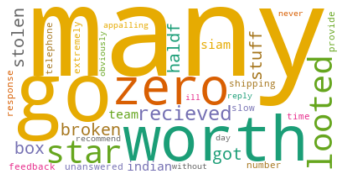

In [14]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

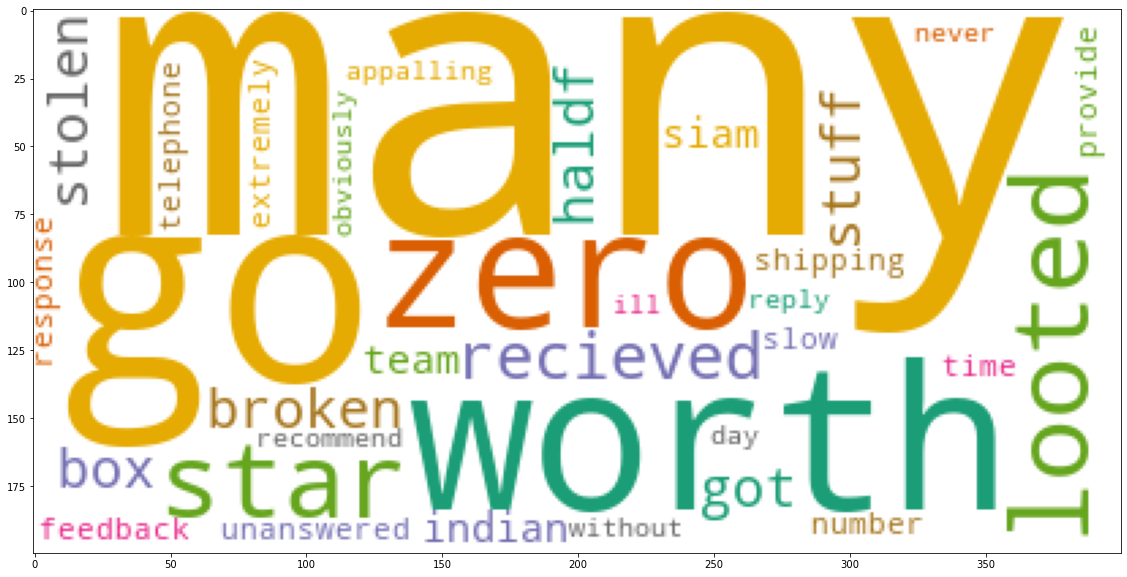

In [15]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [16]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['Reviews_processed2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'Reviews_processed2':'Late reviews'})

In [17]:
column_titles = ['rating','Reviews','Sentiment']
df_late = df_late.reindex(columns=column_titles)
df_late

,rating,Reviews,Sentiment
6,1.0,Siam Shipping are extremely slow to provide fe...,Negative


In [18]:
df_late.to_csv('Late_reviews_siamshipping.csv')